# Coursework 1: Image filtering

In this coursework you will practice image filtering techniques, which are commonly used to smooth, sharpen or add certain effects to images. 
The coursework includes both coding questions and written questions. Please read both the text and code comment in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Export Notebook As...) or print (using the print function of your browser) the notebook as a pdf file, which contains your code, results and text answers, and upload the pdf file onto [Cate](https://cate.doc.ic.ac.uk).

* If Jupyter-lab does not work for you, you can also use Google Colab to write the code and export the pdf file.

## Dependencies:

If you do not have Jupyter-Lab on your laptop, you can find information for installing Jupyter-Lab [here](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html).

There may be certain Python packages you may want to use for completing the coursework. We have provided examples below for importing libraries. If some packages are missing, you need to install them. In general, new packages (e.g. imageio etc) can be installed by running 

`pip3 install [package_name]`

in the terminal. If you use Anaconda, you can also install new packages by running `conda install [package_name]` or using its graphic user interface.

In [1]:
# Import libaries (provided)
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal as sg
import math
import time
from typing import Tuple

## 1. Moving average filter.

Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3 and 11x11 respectively. Perform image filtering on the noisy image.

Design the kernel of the filter by yourself. Then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

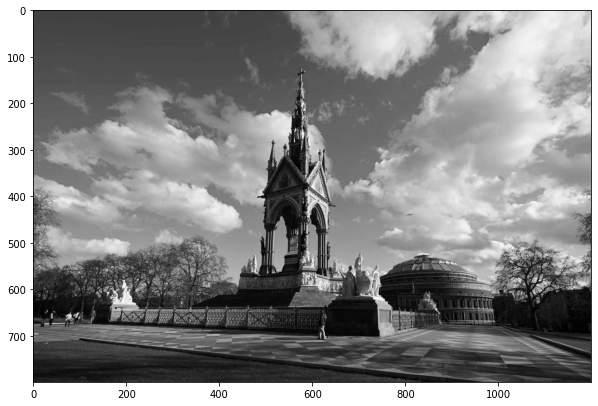

In [2]:
# Read the image (provided)
image = imageio.imread('hyde_park.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

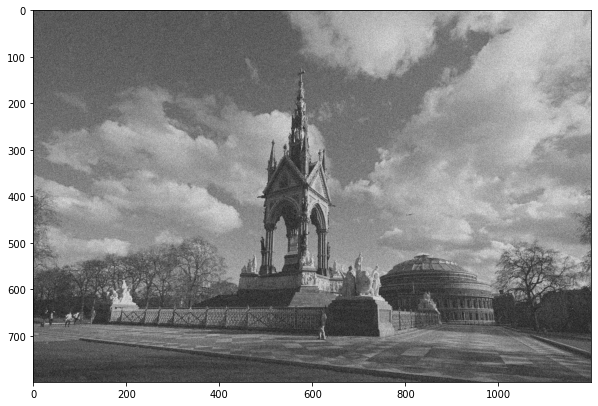

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results. (5 points)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
(799, 1200)


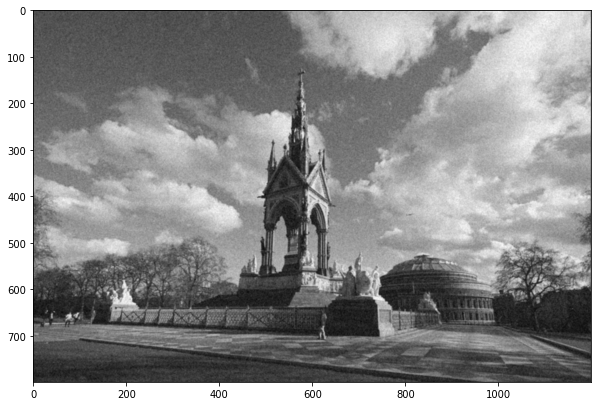

In [4]:
# Design the filter h
h = np.full((3, 3), 1/9)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = sg.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)
print(image_filtered.shape)

### 1.2 Filter the noisy image with a 11x11 moving average filter. (5 points)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

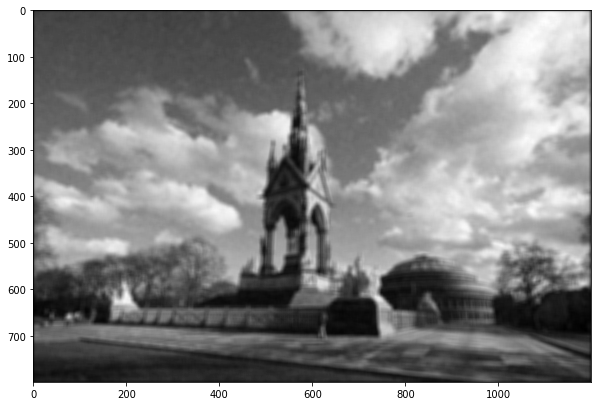

In [5]:
# Design the filter h
h = np.full((11, 11), (1/121))

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = sg.convolve2d(image_noisy, h, mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)
print(image_filtered.shape)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results? (10 points)

Moving average filters have the effect of removing noise by averaging together the values of neighbouring pixels. In both of the above images we can see that some of the Gaussian noise introduced has been removed, but in both cases, the image has also become blurry. Since we are averaging pixels together, as well as eliminating some noise, we are eliminating some detail.

It can be seen that the image produced using the 3x3 kernel has eliminated a bit of the noise (the image is less grainy), but not all of it. However, it is still quite sharp; most (but not all) of the details remain visible. Conversely, in the case of the 11x11 kernel, we see that essentially all of the noise has been removed (the image no longer has any graininess to it), but along with it, a fair amount of detail is lost, such that we can no longer see the exact shape of certain structures - we can only make out a rough outline. The reason for this difference is that the 11x11 kernel takes an average of a much wider area. This causes blurriness for two reasons - (1) many more pixels are averaged together, causing pixels that are close to each other to look similar (thus losing sharpness), and (2) the further away pixels are, the more likely they are to be unrelated, for example, pixels making up the building may be averaged with pixels representing the clouds; since these are totally different in brightness, the image becomes blurry. If the kernel as the same size as the image, all the pixels in the output would have the same colour (maximum blur, zero noise), and if the kernel was size 1x1, the output image would be identical to the input image (zero blur, maximum noise). In the case of moving average filters, the blur is made worse by the fact that far away pixels are given the same weight as pixels that are close by (as long as they all fit in the kernel).

A further difference (which is less obvious when looking at the images) is that the dark section around the edge of the image produced by the 11x11 kernel is much wider. This is because more padding needs to be added around the edge of that image (padding is initialised with value zero, which is black) since the kernel is larger. Therefore, more black pixels are included in the average, thus making the edges darker.

## 2. Edge detection.

Perform edge detection using Prewitt filtering, as well as Gaussian + Prewitt filtering.

### 2.1 Implement 3x3 Prewitt filters and convolve with the noisy image. (10 points)

prewitt_x:
[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
prewitt_y:
[[ 1  1  1]
 [ 0  0  0]
 [-1 -1 -1]]


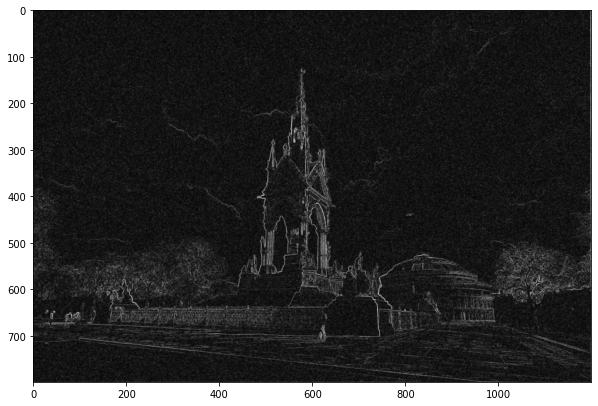

In [6]:
# Design the Prewitt filters
PREWITT_X = np.array([[1, 0, -1],
                      [1, 0, -1],
                      [1, 0, -1]])

PREWITT_Y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

# Print the filters (provided)
print('prewitt_x:')
print(PREWITT_X)
print('prewitt_y:')
print(PREWITT_Y)

def prewitt_filter(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    # Prewitt filtering
    x_edges = sg.convolve2d(image, PREWITT_X, mode='same')
    y_edges = sg.convolve2d(image, PREWITT_Y, mode='same')
    return x_edges, y_edges

def gradient_magnitude(x_edges: np.ndarray, y_edges: np.ndarray) -> np.ndarray:
    # Calculate the gradient magnitude
    return np.sqrt(x_edges**2 + y_edges**2)

# Display the gradient magnitude image (provided)
plt.imshow(gradient_magnitude(*prewitt_filter(image_noisy)), cmap='gray')
plt.gcf().set_size_inches(10, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$. (10 points)

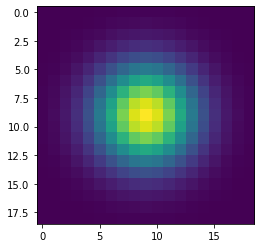

In [7]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma: int, k: int = 3) -> np.ndarray:
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    radius = k * sigma
    dim = (2 * radius) + 1
    
    # range of x and y values [-radius, ..., 0, ..., radius]
    range_xy = np.linspace(-radius, radius, dim)
    
    # grids of x and y values
    x, y = np.meshgrid(range_xy, range_xy)

    h = np.exp(-( (x**2 + y**2) / ( 2.0 * sigma**2 ))) / (2.0 * math.pi * sigma**2)
    return h / h.sum() # Normalise

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels), followed by Prewitt filtering, show the gradient magnitude image. (5 points)

The time taken to perform Gaussian smoothing with sigma 3 was 0.5706150531768799 seconds.


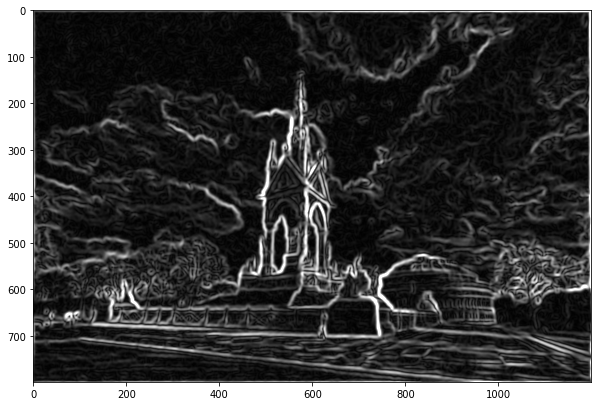

In [8]:
# Construct the Gaussian filter
sigma = 3
gauss_3 = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing before Prewitt filtering
start = time.time()
image_gaussian_3 = sg.convolve2d(image_noisy, gauss_3, mode='same')
end = time.time()
print(f"The time taken to perform Gaussian smoothing with sigma {sigma} was {end - start} seconds.")

# Prewitt filtering
x_edges, y_edges = prewitt_filter(image_gaussian_3)

# Calculate the gradient magnitude
grad_mag = gradient_magnitude(x_edges, y_edges)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Prewitt filtering. (7 points)

The time taken to perform Gaussian smoothing with sigma 7 was 2.9118123054504395 seconds.


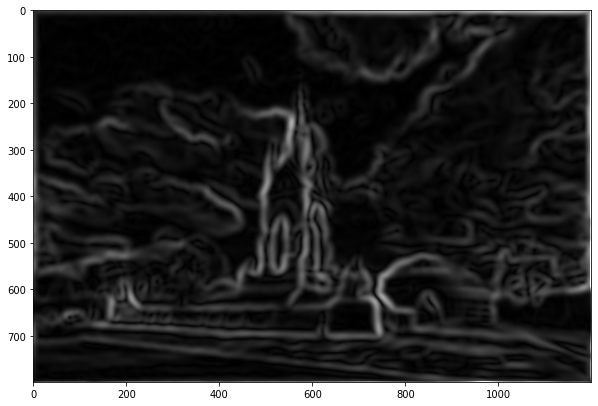

In [9]:
# Construct the Gaussian filter
sigma = 7
gauss_7 = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing before Prewitt filtering
start = time.time()
image_gaussian_7 = sg.convolve2d(image_noisy, gauss_7, mode='same')
end = time.time()
print(f"The time taken to perform Gaussian smoothing with sigma {sigma} was {end - start} seconds.")

# Prewitt filtering
x_edges, y_edges = prewitt_filter(image_gaussian_7)

# Calculate the gradient magnitude
grad_mag = gradient_magnitude(x_edges, y_edges)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

### 2.5 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively. (10 points)

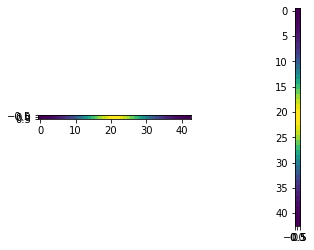

In [10]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma: int, k: int = 3) -> np.ndarray:
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    radius = k * sigma
    dim = 2 * radius + 1
    range_values = np.linspace(-radius, radius, dim)
    return np.exp(-(range_values**2 / ( 2.0 * sigma**2 ))) / (math.sqrt(2.0 * math.pi) * sigma)

# sigma = 7 pixel (provided)
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = np.array(gaussian_filter_1d(sigma), ndmin=2)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = np.transpose(np.array(gaussian_filter_1d(sigma), ndmin=2))

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 7 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Prewitt filtering, show results and check whether the results are the same as the previous one without separable filtering. (9 points)

The time taken to perform Gaussian smoothing with sigma 7 was 0.26183223724365234 seconds.


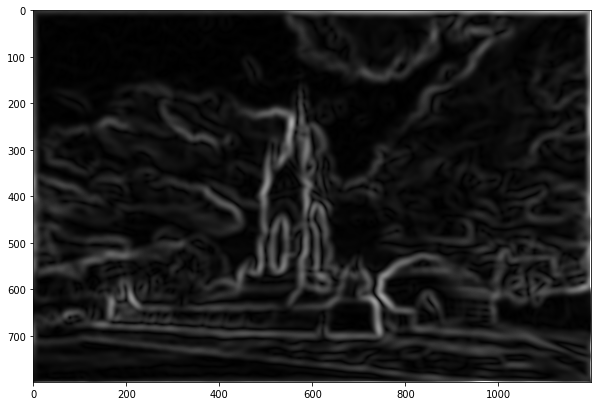

In [11]:
# Perform separable Gaussian smoothing and count time
start = time.time()
smoothed = sg.convolve2d(sg.convolve2d(image_noisy, h_y, mode='same'), h_x, mode='same')
end = time.time()
print(f"The time taken to perform Gaussian smoothing with sigma {sigma} was {end - start} seconds.")

# Prewitt filtering
x_edges, y_edges = prewitt_filter(smoothed)

# Calculate the gradient magnitude
grad_mag2 = gradient_magnitude(x_edges, y_edges)

# Display the gradient magnitude image (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.


### 2.7 Comment on the Gaussian + Prewitt filtering results and the computational time. (9 points)

Prewitt filtering is used to detect edges. Looking at the output of 2.1, we can see that it has successfully detected many of the edges in the original image. However, due to the noise added to the image, we can also see that there is a lot of noise in the Prewitt filter output (if you look closely, you see the output is quite grainy due to the fact that derivates are very sensitive to noise). 

We want to remove this noise whilst introducing minimal blur, so we use Gaussian smoothing. With Gaussian smoothing, we can choose the parameter sigma (standard deviation). The larger it is, the more importance is given to pixels that are further away, and correspondingly the size of the kernel grows in proportion to the value of sigma. Thus a larger sigma removes more noise but introduces greater blur. 

When sigma=3, we can see that the edges detected are clearer and less noisy than with no Gaussian smoothing. Edges that were mostly drowned out by noise (such as those of the clouds) are now clearly differentiated from the surrounding noise. However, there is some minor blurring, and a bit of noise remains. When sigma=7, there is essentially no noise, however, the edges have become quite faint (due to blur), and some edges are completely lost.

Comparing computational time, we see that with a sigma of 3, 2D Gaussian smoothing takes around 0.571 seconds, whilst a sigma of 7 takes around 2.912 seconds (this is clearly non-linear). This difference is due to the fact that the kernel size is much greater with a sigma of 7, and thus more calculations need to be performed. When we instead use the two separable 1D filters to perform the smoothing with sigma=7, it takes 0.262 seconds - faster even than sigma=3 in the 2D case! This difference in performance is due to the fact that using the two separable filters achieves the same effect with far fewer calculations.  

## 3. Challenge: Implement a 2D Gaussian filter using Pytorch.

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [12]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor. (7 points)

In [13]:
# Expand the dimension of the numpy array
expanded = np.array(image_noisy, ndmin=4)
print(expanded.shape)

# Convert to a Pytorch tensor using torch.from_numpy
tensor_noisy = torch.from_numpy(expanded)

(1, 1, 799, 1200)


### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter. (7 points)

In [14]:
# A 2D Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
print(h.shape)

# Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=h.shape[0], bias=False)

# Set the kernel weight
conv.weight = torch.nn.Parameter(torch.from_numpy(np.array(h, ndmin=4)))
print(conv.weight.shape)

(19, 19)
torch.Size([1, 1, 19, 19])


### 3.3 Apply the filter to the noisy image tensor and display the output image. (6 points)

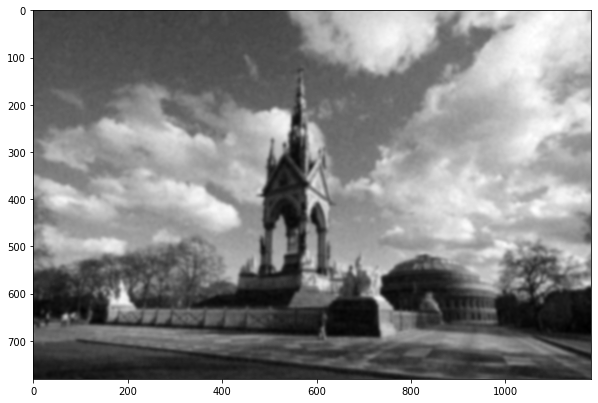

In [15]:
# Filtering
with torch.no_grad():
    image_filtered = torch.squeeze(conv(tensor_noisy))

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

## 4. Survey: How long does it take you to complete the coursework?

In [16]:
# About 3.5 hours